## Importando Bibliotecas

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore')

## Leitura de Dados e Visualização de Conteúdo

In [427]:
df = pd.read_csv('games.csv')

In [428]:
df.head()

,id,metascore,platform,release_date,sort_no,summary,title,user_score
0,543718,91,PC,"August 18, 2020",301,"From light planes to wide-body jets, fly highl...",Microsoft Flight Simulator,7.1
1,555108,91,PC,"December 8, 2022",302,"Take up your sword, channel your magic or boar...",Chained Echoes,8.7
2,106820,91,PlayStation 2,"November 7, 2005",303,"Strap on your Guitar Hero SG controller, plug-...",Guitar Hero,8.5
3,110775,91,PC,"November 13, 2008",304,"Players last visited Northrend in ""Warcraft II...",World of Warcraft: Wrath of the Lich King,7.7
4,142864,91,Wii,"October 26, 2010",305,Rock Band returns with the third iteration of ...,Rock Band 3,6.8


In [429]:
df.shape

(20022, 8)

In [430]:
df.dtypes

id               int64
metascore        int64
platform        object
release_date    object
sort_no          int64
summary         object
title           object
user_score      object
dtype: object

In [431]:
df['metascore'] = pd.to_numeric(df['metascore'],downcast='float')
df['user_score'] = df['user_score'].str.replace('tbd', '')
df['user_score'] = pd.to_numeric(df['user_score'],downcast='float') * 10

In [432]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['age'] = 2023 - df['release_date'].dt.year

In [433]:
#salvando os dados do dataframe em um arquivo csv
df.to_csv('games_analiseexpl.csv', index=False)

## Análise Exploratória de Dados / Visualização de Dados

Distribuição de valores

In [434]:
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "MetaScore", "UserScore", "Plataforma", "Idade"))

fig.add_trace(
    go.Histogram(x=df['metascore'], name="nota críticos"),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['user_score'], name="nota players"),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['platform'], name="plataforma",texttemplate="%{y}", textfont_size=8),
    row=2, col=1
).update_xaxes(categoryorder='total descending')

fig.add_trace(
    go.Histogram(x=df['age'].astype(np.float64), name="idade (anos)"),
    row=2, col=2
).update_xaxes(categoryorder='total descending')


fig.update_layout(title_text="Distribuição de notas")
fig.show()


Top 10 Jogos - Notas de Críticos

In [435]:
top_user_score = df.sort_values(['metascore'], ascending=False)[:10]
top_user_score[['title','user_score','platform']]

,title,user_score,platform
100,The Legend of Zelda: Ocarina of Time,91.0,Nintendo 64
101,Tony Hawk's Pro Skater 2,74.0,PlayStation
102,Grand Theft Auto IV,78.0,PlayStation 3
103,SoulCalibur,84.0,Dreamcast
104,Grand Theft Auto IV,80.0,Xbox 360
115,Perfect Dark,88.0,Nintendo 64
113,The Legend of Zelda: Breath of the Wild,87.0,Switch
122,NFL 2K1,63.0,Dreamcast
121,Halo: Combat Evolved,87.0,Xbox
120,Super Mario Odyssey,89.0,Switch


Top 10 Jogos - Nota de usuários

In [436]:
top_user_score = df.sort_values(['user_score'], ascending=False)[:10]
top_user_score[['title','user_score','platform']]

,title,user_score,platform
2604,Ghost Trick: Phantom Detective,97.0,DS
3736,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,97.0,PSP
21,Resident Evil (2002),96.0,GameCube
4887,Superliminal,96.0,Xbox One
13337,Crystar,96.0,PlayStation 4
7879,Superliminal,96.0,Switch
15857,Metal Torrent,96.0,DS
2468,Vanquish,96.0,Xbox 360
11738,Tengami,96.0,Wii U
64,Resident Evil 3: Nemesis,96.0,PlayStation


Geração com os melhores jogos

In [437]:
era = df
era['release_date'] = pd.to_datetime(era['release_date'])
era['year'] = df['release_date'].dt.year
era1 =df.groupby('year')
era2 = df.sort_values(['metascore'], ascending = False)
era2[['year','metascore']]
era2 =era.groupby('year')
era2.head()
era2['metascore'].sum().sort_values(ascending = False).reset_index()
era3 = era2['metascore'].sum().sort_values(ascending = False).reset_index()
era3.columns = ["year", "Total"] 

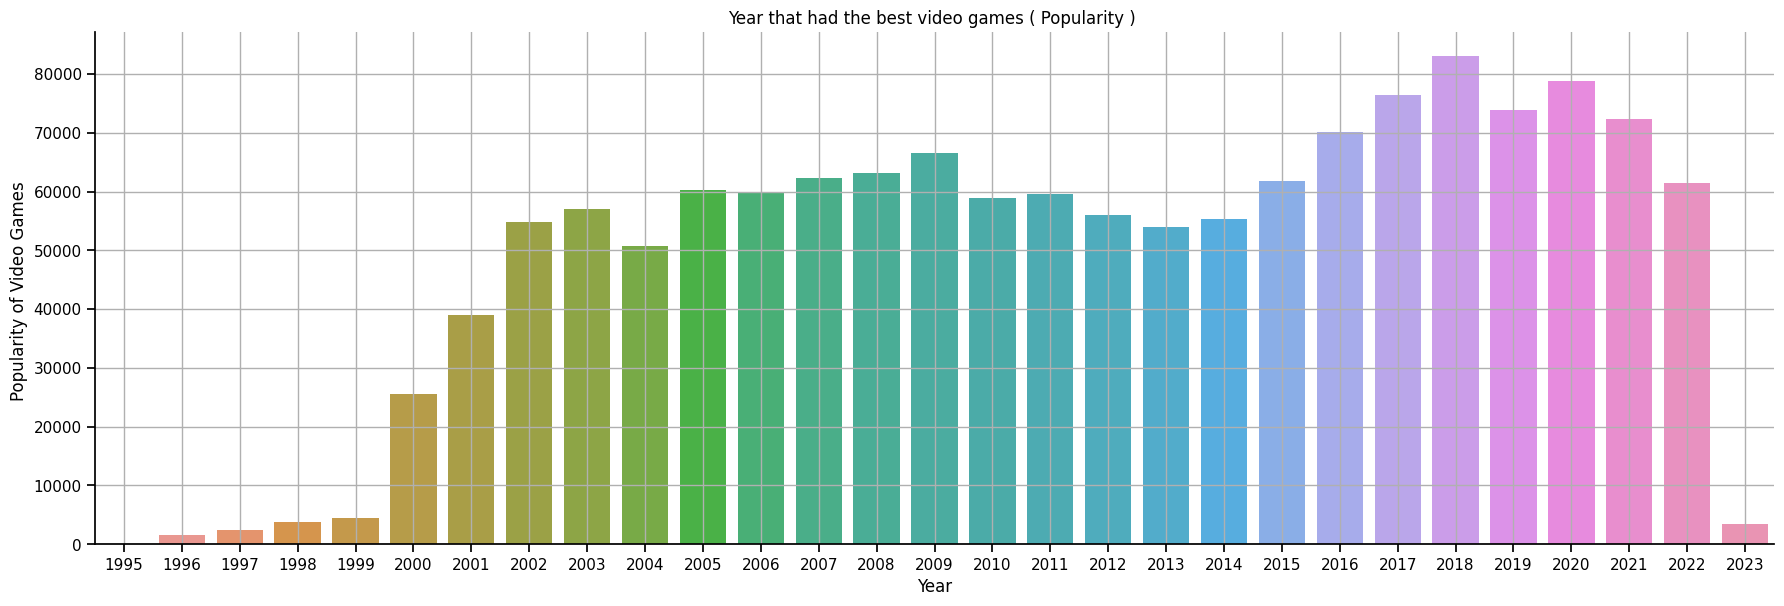

In [438]:
sns.catplot(x="year", y="Total", kind="bar", data=era3, height=6, aspect=3)
plt.title("Year that had the best video games ( Popularity ) ")
plt.xlabel('Year')
plt.ylabel("Popularity of Video Games ")
plt.grid(True)

Média de MetaScore por Plataforma

In [439]:
mean_by_platform = df \
    .groupby('platform', as_index = False) \
    .agg({'metascore' : 'mean'}) \
    .rename(columns = {'metascore' : 'avg_meta_score'}) \
    .sort_values('avg_meta_score', ascending = False)
mean_by_platform['avg_meta_score'] = round(mean_by_platform['avg_meta_score'], 2)

fig = go.Figure(data=[go.Bar(
            x = mean_by_platform['platform'], 
            y = mean_by_platform['avg_meta_score'],
            text = mean_by_platform['avg_meta_score'],
            marker_color = '#A6ACEC',
            textposition = 'outside',
            textfont_color = 'black',
            textfont_size = 8,
            textfont_family = 'Arial'
        )])

fig.update_layout(
    title = dict(
        y = 0.93,
        text ='Média de nota de críticos por plataforma',
        font = dict(
            color = 'black',
            size = 26,
            family = 'Arial')),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    showlegend = False)

fig.update_xaxes(showgrid = False, 
                 showline = True,
                 color = 'black',
                 tickangle = -90,
                 linecolor = 'black',
                 tickfont = dict(
                     color = 'black',
                     family = 'Arial')) 

fig.update_yaxes(visible = False)

fig.show()

In [440]:
mean_by_year = df \
    .groupby('year', as_index = False) \
    .agg({'metascore' : 'mean'}) \
    .rename(columns = {'metascore' : 'mean'})

fig = go.Figure(data=go.Scatter(x = mean_by_year['year'], 
                                y = mean_by_year['mean'],
                                mode = 'lines+markers',
                                marker = dict(
                                    color = 'black',
                                    size = 10),
                                line = dict(
                                    color = '#A6ACEC',
                                    width = 3)))
fig.add_shape(type = 'line',
              x0 = mean_by_year['year'].min(), y0 = round(mean_by_year['mean'].mean()), 
              x1 = mean_by_year['year'].max(), y1 = round(mean_by_year['mean'].mean()),
              line=dict(
                  color = 'crimson',
                  width = 2,
                  dash = 'dot'))

fig.add_vrect(
    x0 = 1999, 
    x1= 2009,
    y1 = 0.92,
    fillcolor = 'crimson', 
    opacity = 0.1,
    layer = 'below', 
    line_width=0,
)

fig.add_annotation(
    showarrow = False,
    x = 2004,
    y = 96,
    text = 
f''' Período em que houve crescimento de número de jogos lançados por ano''',
    font = dict(
        size = 11, 
        color = 'black', 
        family = 'Arial'),
    bordercolor = 'black',
    align = 'left',
    borderwidth = 0,
    borderpad = 1,
    bgcolor = 'white',
    opacity = 0.8
  )

fig.update_layout(
    title = dict(
    text = 'Média de nota de críticos por ano de lançamento',
    font = dict(
        color = 'black',
        size = 26,
        family = 'Arial')),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    showlegend = False)
fig.update_xaxes(showgrid = True, 
                 gridwidth = 1, 
                 gridcolor = '#DCDCDC', 
                 showline = True,
                 color = 'black',
                 linecolor = 'black',
                 tickfont = dict(
                     color = 'black',
                     family = 'Arial')) 
fig.update_yaxes(showgrid = True, 
                 gridwidth = 1,
                 gridcolor = '#DCDCDC',
                 showline = True,
                 color = 'black',
                 linecolor = 'black',
                 rangemode = 'tozero',
                 tickfont = dict(
                     color = 'black',
                     family = 'Arial'))
fig.show()

In [441]:
fig = px.scatter(df, x = df['user_score'], y = df['metascore'], trendline = 'ols')
fig.data[1].marker.color = '#A6ACEC'
fig.data[1].line.color = 'crimson'
fig.data[1].line.width = 3
fig.update_layout(
    title = dict(
    text = 'Razão de nota de jogadores vs nota de críticos',
    font = dict(
        color = 'black',
        size = 26,
        family = 'Arial')),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    showlegend = False)

fig.update_xaxes(
                 title = 'nota de jogadores',
                 showgrid = True, 
                 gridwidth = 1, 
                 gridcolor = '#DCDCDC', 
                 showline = True,
                 color = 'black',
                 linecolor = 'black',
                 tickfont = dict(
                     color = 'black',
                     family = 'Arial')) 
fig.update_yaxes(
                 title = 'nota de críticos',
                 showgrid = True, 
                 gridwidth = 1,
                 gridcolor = '#DCDCDC',
                 showline = True,
                 color = 'black',
                 linecolor = 'black',
                 rangemode = 'tozero',
                 tickfont = dict(
                     color = 'black',
                     family = 'Arial'))
fig.show()

In [442]:
print('Eras dos vídeo-games:\n      Era 1: 1995 - 1999\n      Era 2: 2000 - 2004\n      Era 3: 2005 - 2012\n      Era 4: 2013 - 2019\n      Era 5: 2020 - Atualmente')

Eras dos vídeo-games:
      Era 1: 1995 - 1999
      Era 2: 2000 - 2004
      Era 3: 2005 - 2012
      Era 4: 2013 - 2019
      Era 5: 2020 - Atualmente


In [443]:
def era(data):
    if 1995 <= data <= 1999:
        x = 'era_1'
    elif 2000 <= data <= 2004:
        x = 'era_2'
    elif 2005 <= data <= 2012:
        x = 'era_3'
    elif 2013 <= data <= 2019:
        x = 'era_4'
    else:
        x = 'era_5'
    return x
df['era'] = df['year'].apply(era)

era_avg = df \
    .groupby('era', as_index = False) \
    .agg({'metascore' : 'mean'}) \
    .rename(columns = {'metascore' : 'avg_meta_score'})
era_avg['avg_meta_score'] = round(era_avg['avg_meta_score'], 2)

fig = go.Figure(data=[go.Bar(
            x = era_avg['era'], 
            y = era_avg['avg_meta_score'],
            text = era_avg['avg_meta_score'].round(0),
            marker_color = '#A6ACEC',
            textposition = 'outside',
            textfont_color = 'black',
            textfont_size = 12,
            textfont_family = 'Arial'
        )])

fig.update_layout(title = dict(
    text ='Média de nota de críticos por era',
    font = dict(
        color = 'black',
        size = 26,
        family = 'Arial')),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    showlegend = False)

fig.update_xaxes(showgrid = False, 
                 showline = True,
                 color = 'black',
                 linecolor = 'black',
                 tickfont = dict(
                     color = 'black',
                     family = 'Arial'),
                 dtick = 1) 

fig.update_yaxes(visible = False)

fig.show()


## Preparação de Dados

Correlação de Variáveis

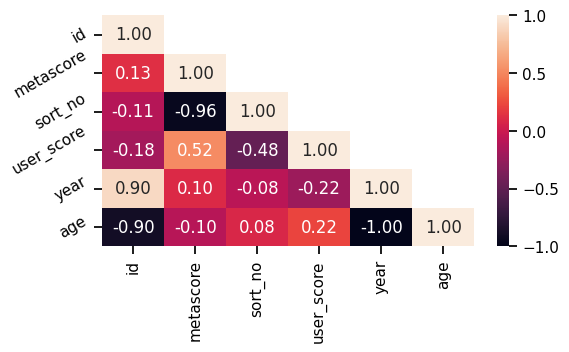

In [444]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(6,3))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Checagem de duplicados

In [445]:
df['id'].duplicated().sum()

0

Remoção de Colunas

In [446]:
df.drop(columns=['release_date','sort_no','summary','title','id'],axis=1,inplace=True)

Remoção de NaNs

In [447]:
df.isna().sum()

metascore        0
platform         0
user_score    1382
year             0
age              0
era              0
dtype: int64

In [448]:
# Optado manter as entradas sem user score, copiando o metascore para o mesmo
df['user_score'].fillna(df['metascore'],inplace=True)
df.isna().sum()

metascore     0
platform      0
user_score    0
year          0
age           0
era           0
dtype: int64

In [449]:
df['platform'].value_counts()

PC                  5276
PlayStation 4       2122
Switch              1691
Xbox 360            1665
PlayStation 2       1421
PlayStation 3       1265
Xbox One            1201
Xbox                 794
DS                   728
Wii                  663
PSP                  514
GameCube             452
Game Boy Advance     442
3DS                  398
PlayStation 5        334
PlayStation Vita     258
Xbox Series X        222
PlayStation          189
Wii U                186
Dreamcast            125
Nintendo 64           71
Stadia                 5
Name: platform, dtype: int64

In [450]:
#categorizando os valores de metascore
df['binned_metascore']=pd.cut(df['metascore'], bins=[0,40,60,80,100], right=True, labels=False)+1

In [451]:
#criando novas colunas para transformar os valores categóricos de 'platform' (plataforma)
#em valores numéricos
df = pd.get_dummies(data = df, columns=['platform'], prefix=['platform'], drop_first=True)

In [452]:
df.to_csv('games_com_notabinada.csv', index=False)

## Engenharia de Recursos

In [453]:
list(df.columns)

['metascore',
 'user_score',
 'year',
 'age',
 'era',
 'binned_metascore',
 'platform_DS',
 'platform_Dreamcast',
 'platform_Game Boy Advance',
 'platform_GameCube',
 'platform_Nintendo 64',
 'platform_PC',
 'platform_PSP',
 'platform_PlayStation',
 'platform_PlayStation 2',
 'platform_PlayStation 3',
 'platform_PlayStation 4',
 'platform_PlayStation 5',
 'platform_PlayStation Vita',
 'platform_Stadia',
 'platform_Switch',
 'platform_Wii',
 'platform_Wii U',
 'platform_Xbox',
 'platform_Xbox 360',
 'platform_Xbox One',
 'platform_Xbox Series X']

In [454]:
#escolhendo as colunas do dataframe que serão nossos valores de entrada para o modelo
X=pd.DataFrame(columns=['user_score','age','platform_DS','platform_Dreamcast',
                        'platform_Game Boy Advance','platform_GameCube','platform_Nintendo 64','platform_PC','platform_PSP',
                        'platform_PlayStation','platform_PlayStation 2','platform_PlayStation 3',
                        'platform_PlayStation 4','platform_PlayStation 5',
                        'platform_PlayStation Vita','platform_Stadia','platform_Switch',
                        'platform_Wii','platform_Wii U','platform_Xbox',
                        'platform_Xbox 360','platform_Xbox One','platform_Xbox Series X',],data=df)

In [455]:
#escolhendo a(s) coluna(s) do dataframe que serão a resposta do modelo
y = pd.DataFrame(columns=['binned_metascore'], data=df)

In [456]:
#importando o pacote de divisão dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [457]:
#dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [458]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **Machine Learning**

In [459]:
#importando, configurando e treinando o modelo de regressão 
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(verbose=0, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

In [460]:
#verificando os valores preditos
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [461]:
#importando o pacote de métricas e calculando a matriz de confusão
from sklearn import metrics
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[  12   75   31    0]
 [   8  213  735    4]
 [   3  138 3371  148]
 [   0   21  984  264]]


In [462]:
#verificando quantos valores existem de cada categoria em 'binned_metascore'
df['binned_metascore'].value_counts()

3    12055
4     4280
2     3269
1      418
Name: binned_metascore, dtype: int64

In [463]:
#métricas finais
print(metrics.classification_report(y_test, y_pred, target_names=['1','2', '3', '4']))

              precision    recall  f1-score   support

           1       0.52      0.10      0.17       118
           2       0.48      0.22      0.30       960
           3       0.66      0.92      0.77      3660
           4       0.63      0.21      0.31      1269

    accuracy                           0.64      6007
   macro avg       0.57      0.36      0.39      6007
weighted avg       0.62      0.64      0.59      6007



In [464]:
#importação do pacote para salvar o modelo
import pickle

In [465]:
#definindo em qual caminho vamos salvar o modelo
modelo_treinado = 'modelo_games.sav'

In [466]:
#salvando o modelo
pickle.dump(logit, open(modelo_treinado, 'wb'))

In [467]:
#carregando o modelo treinado
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [468]:
#Olhando o conteúdo de um vetor de teste
X_test[0]

array([ 0.43189146, -1.42001066, -0.19373516, -0.0812882 , -0.15383492,
       -0.15480422, -0.06102563, -0.59979622, -0.16074231, -0.09898978,
       -0.27584469, -0.25899385, -0.34061952, -0.13283259, -0.11785539,
       -0.01194674,  3.30570107, -0.17897598, -0.09862162, -0.2043895 ,
       -0.30110045, -0.25393755, -0.10540545])

In [469]:
#fazendo predição do novo dado com o modelo carregado
modelo_carregado.predict([X_test[222]])

array([3], dtype=int64)